### 1. Даны значения величины  заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать  коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

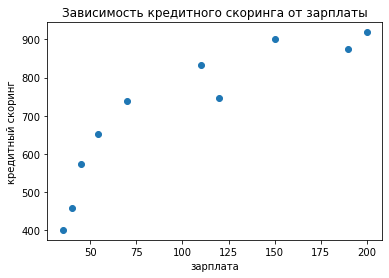

In [2]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
                           
plt.scatter(X, y)
plt.title('Зависимость кредитного скоринга от зарплаты')
plt.xlabel('зарплата')
plt.ylabel('кредитный скоринг')
plt.show()

### $ B = (X^{T} \cdot X)^{-1} \cdot  X^{T} \cdot Y $

### use intercept (without matrix)

In [3]:
b = (X.shape[0] * sum(X * y) - sum(X) * sum(y)) / (X.shape[0] * sum(X ** 2) - (sum(X)) ** 2)

a = np.mean(y) - b * np.mean(X) 
a, b

(444.17735732435955, 2.6205388824027653)

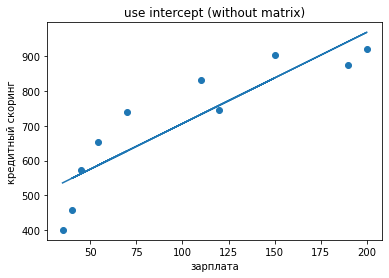

In [4]:
plt.scatter(X, y)
plt.plot(X, a + X * b)
plt.title("use intercept (without matrix)")
plt.xlabel('зарплата')
plt.ylabel('кредитный скоринг')
plt.show()

 ### without intercept (without matrix)

In [5]:
b = np.mean(y * X) / np.mean(X**2)
b

5.889820420132688

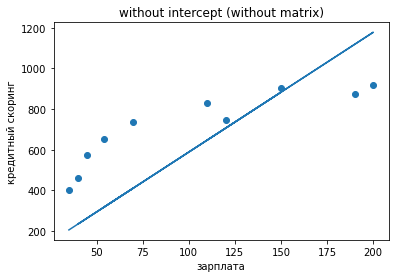

In [6]:
plt.scatter(X, y)
plt.plot(X, X * b)
plt.title("without intercept (without matrix)")
plt.xlabel('зарплата')
plt.ylabel('кредитный скоринг')
plt.show()

### without intercept (matrix)

In [7]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = y.reshape((y.shape[0], 1))
X = X.reshape((X.shape[0], 1))

a = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
a

array([[5.88982042]])

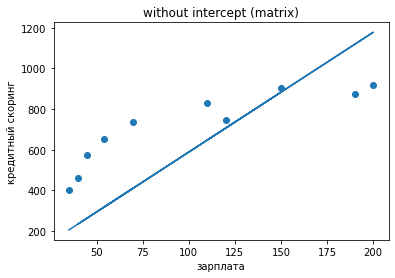

In [8]:
plt.scatter(X, y)
plt.plot(X, X * b)
plt.title("without intercept (matrix)")
plt.xlabel('зарплата')
plt.ylabel('кредитный скоринг')
plt.show()

### use intercept (matrix)

In [9]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_ = y.reshape((y.shape[0], 1))
X_ = X.reshape((X.shape[0], 1))
X_ = np.hstack([np.ones((X_.shape[0], 1)), X_])

b = np.dot(np.dot(np.linalg.inv(np.dot(X_.T, X_)), X_.T), y_)
b

array([[444.17735732],
       [  2.62053888]])

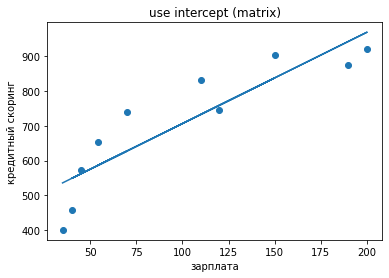

In [10]:
plt.scatter(X, y)
plt.plot(X, b[0][0] + X * b[1][0])
plt.title("use intercept (matrix)")
plt.xlabel('зарплата')
plt.ylabel('кредитный скоринг')
plt.show()

### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [11]:
import numpy as np

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha_ = 1e-5
b_1 = 0.5
epsilon = 10e-12
iteration = 0

In [12]:
# derivative mse = 2 / n * (b_1 * zp - ks) * zp
def mse(b_1, zp_=zp, ks_=ks):
    return np.sum((b_1 * zp - ks) ** 2) / zp.shape[0]

while True:
    b_= b_1
    b_1 -= alpha_ * (2 / zp.shape[0]) * np.sum((b_1 * zp - ks)  * zp)
    iteration += 1
    if iteration % 10 == 0:
        print(f'Итерация: {iteration}, b_1:{b_1}, mse:{mse(b_1)}')
    if abs(mse(b_) - mse(b_1)) < epsilon:
           break
    

Итерация: 10, b_1:5.675152885611211, mse:57151.7137686105
Итерация: 20, b_1:5.881270571197946, mse:56517.86548403328
Итерация: 30, b_1:5.8894798939466035, mse:56516.86001322754
Итерация: 40, b_1:5.889806857544122, mse:56516.85841825353
Итерация: 50, b_1:5.889819879957465, mse:56516.85841572344
Итерация: 60, b_1:5.889820398618412, mse:56516.85841571941


### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

##### Таблица значений функции Лапласа - известно среднеквадратичное отклонение генеральной совокупности (сигма), Стьюдента - когда сигма неизвестна.

### 4. Произвести вычисления как в пункте 2, но с вычислением  intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [13]:
import numpy as np

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha_ = 1e-5
b_1 = 1
b_0 = 20
epsilon = 10e-12
iteration = 0

# derivative mse = 2 / n * (b_1 * zp - ks) * zp
def mse(b_0, b_1, zp_=zp, ks_=ks):
    return np.sum(((b_0 + b_1 * zp) - ks) ** 2) / zp.shape[0]

while True:
    b_= b_1
    b_0_ = b_0
    b_1 -= alpha_ * (2 / zp.shape[0]) * np.sum(((b_0 + b_1 * zp) - ks) * zp)
    b_0 -= alpha_ * (2 / zp.shape[0]) * np.sum((b_0 + b_1 * zp) - ks)
    iteration += 1
    if iteration % 100000 == 0:
        print(f'Итерация: {iteration},b_0:{b_0}, b_1:{b_1}, mse:{mse(b_0, b_1)}')
    if abs(mse(b_0_, b_) - mse(b_0, b_1)) < epsilon:
        print(f'Итерация: {iteration},b_0:{b_0}, b_1:{b_1}, mse:{mse(b_0, b_1)}')
        break

Итерация: 100000,b_0:188.790151674337, b_1:4.500301629673251, mse:23015.10547423481
Итерация: 200000,b_0:290.405562588564, b_1:3.7523672783850865, mse:12468.51502284021
Итерация: 300000,b_0:351.5894581142899, b_1:3.302026756237874, mse:8644.961484837439
Итерация: 400000,b_0:388.4290382333076, b_1:3.0308711587733934, mse:7258.773054998984
Итерация: 500000,b_0:410.6106049950279, b_1:2.8676050203282495, mse:6756.225269563118
Итерация: 600000,b_0:423.9664006478209, b_1:2.76930045936022, mse:6574.03194633955
Итерация: 700000,b_0:432.0080903731492, b_1:2.710110067530274, mse:6507.979706156045
Итерация: 800000,b_0:436.8500912033145, b_1:2.674470800638923, mse:6484.033173121472
Итерация: 900000,b_0:439.7655197811517, b_1:2.653011957315125, mse:6475.3516137559845
Итерация: 1000000,b_0:441.52093538115406, b_1:2.640091322381738, mse:6472.204207285577
Итерация: 1100000,b_0:442.5778928220457, b_1:2.6323116483069096, mse:6471.0631487414985
Итерация: 1200000,b_0:443.21429996793387, b_1:2.627627410340